In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

In [2]:
mouse_metadata = pd.read_csv("Mouse_metadata.txt")
study_results = pd.read_csv("Study_results.txt")

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


<h2>Merge the two data.</h2>

In [5]:
combined_data = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


<h2> Cleaning the new data by Removing Duplicates </h2>

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_data = combined_data[combined_data['Mouse ID'].isin(dup_mice_ID)==False]
df = filtered_data

## Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

In [8]:
Mean = df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median = df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Variance = df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [9]:
summary_statistics = pd.DataFrame({
    "Mean":Mean,
    "Median":Median,
    "Variance":Variance,
    "STD": std,
    "SEM": sem
})
summary_statistics = summary_statistics.style.set_caption("Summary statistics table of the tumor volume for each drug regimen.",)
summary_statistics

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of total mice for each treatment regimen throughout the course of the study.

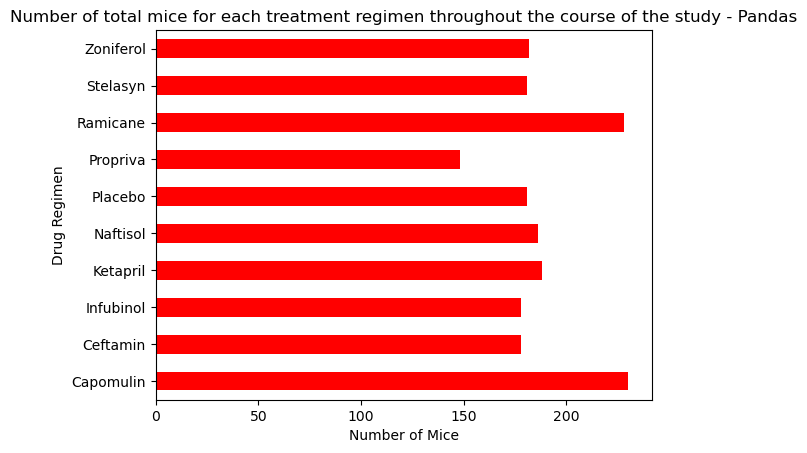

--------------------------------------------------------------------------------


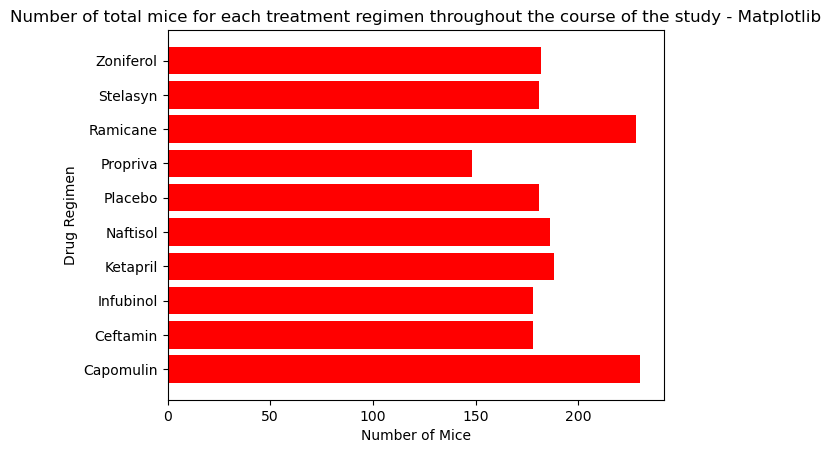

In [10]:
# Using Pandas
total_mice = df.groupby("Drug Regimen").size()
total_mice.plot.barh(color="red")
pt.title("Number of total mice for each treatment regimen throughout the course of the study - Pandas")
pt.ylabel("Drug Regimen")
pt.xlabel("Number of Mice")
pt.show()

print("-"*80)

# using Matplotlib

# First get the regimens and their counts...
key, value = np.unique(df["Drug Regimen"], return_counts = True)
count_regimens  = dict(zip(key,value))
pt.title("Number of total mice for each treatment regimen throughout the course of the study - Matplotlib")
pt.ylabel("Drug Regimen")
pt.xlabel("Number of Mice")
pt.barh(key, value, color='red')
pt.show()

## Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

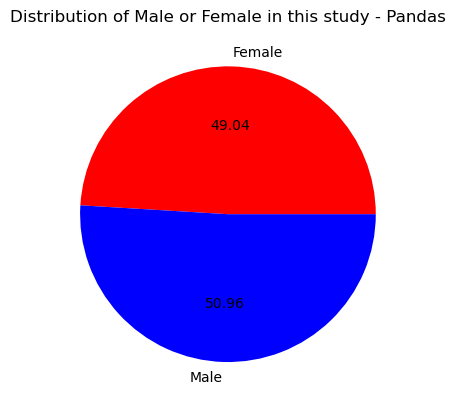

--------------------------------------------------------------------------------


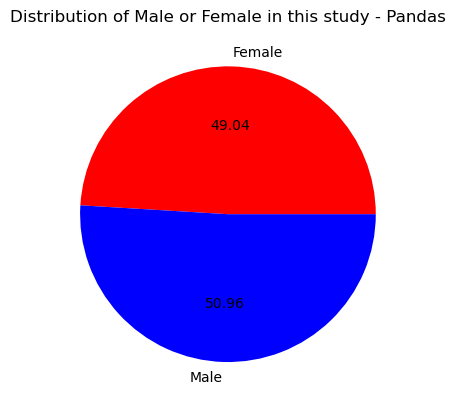

In [11]:
# Using pandas

fig = pt.figure()


gender_data = df.groupby("Sex").size()
gender_data.name = ""
colors = ["Red", "Blue"]
pt.title("Distribution of Male or Female in this study - Pandas")
gender_data.plot.pie(autopct = "%.2f", colors = colors)
pt.show()

print("-"*80)
# Using Matplotlib

key, value = np.unique(df["Sex"], return_counts = True)
colors = ["Red", "Blue"]
labels = ["Female", "Male"]
pt.title("Distribution of Male or Female in this study - Pandas")
pt.pie(value, colors=colors, labels=labels, autopct = "%.2f")
pt.show()